The RandomizedLogisticRegression is not stable between kernels.
Just create a notebook and do all the analysis + print output to files,
So yoiu won't have problem on making the figures

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Read HDF file and phenotypes

In [3]:
final_SNPs = pd.read_hdf('data/BeanCAP_MDP_genotype_data.hdf5', 'snptable')
pheno_all = pd.read_csv('data/Adjusted-means-for-Agronomic-traits-with-race-and-market-calss-info.txt',
                       sep = '\t', header=0)
pheno_all.head()

,supop,market_class,taxa,df_co,dm_co,ch_co,lg_co,gh_co,sw_co,df_mi,...,dm_ne,ch_ne,lg_ne,sw_ne,df,dm,ch,lg,gh,sw
0,MA,black,115m,49,92,50,4,2,20.0,41,...,96,41,4,20.5,49,102,45,3.67,2.5,21.5
1,DJ,pink,6r_42,46,90,41,5,3,29.9,38,...,101,40,5,30.5,47,103,37,5.00,3.0,32.3
2,MA,black,92bg_7,49,87,48,3,3,22.8,44,...,79,33,2,21.7,50,92,39,2.33,2.5,21.7
3,DJ,pinto,92us_1006,46,82,45,1,2,30.3,38,...,78,45,1,29.2,45,90,43,1.33,2.0,31.3
4,MA,cream_caroca,a_285,51,94,55,3,3,22.2,45,...,95,40,3,20.9,52,103,48,3.00,2.5,23.1


Since it is the first analysis I will do some data exploration

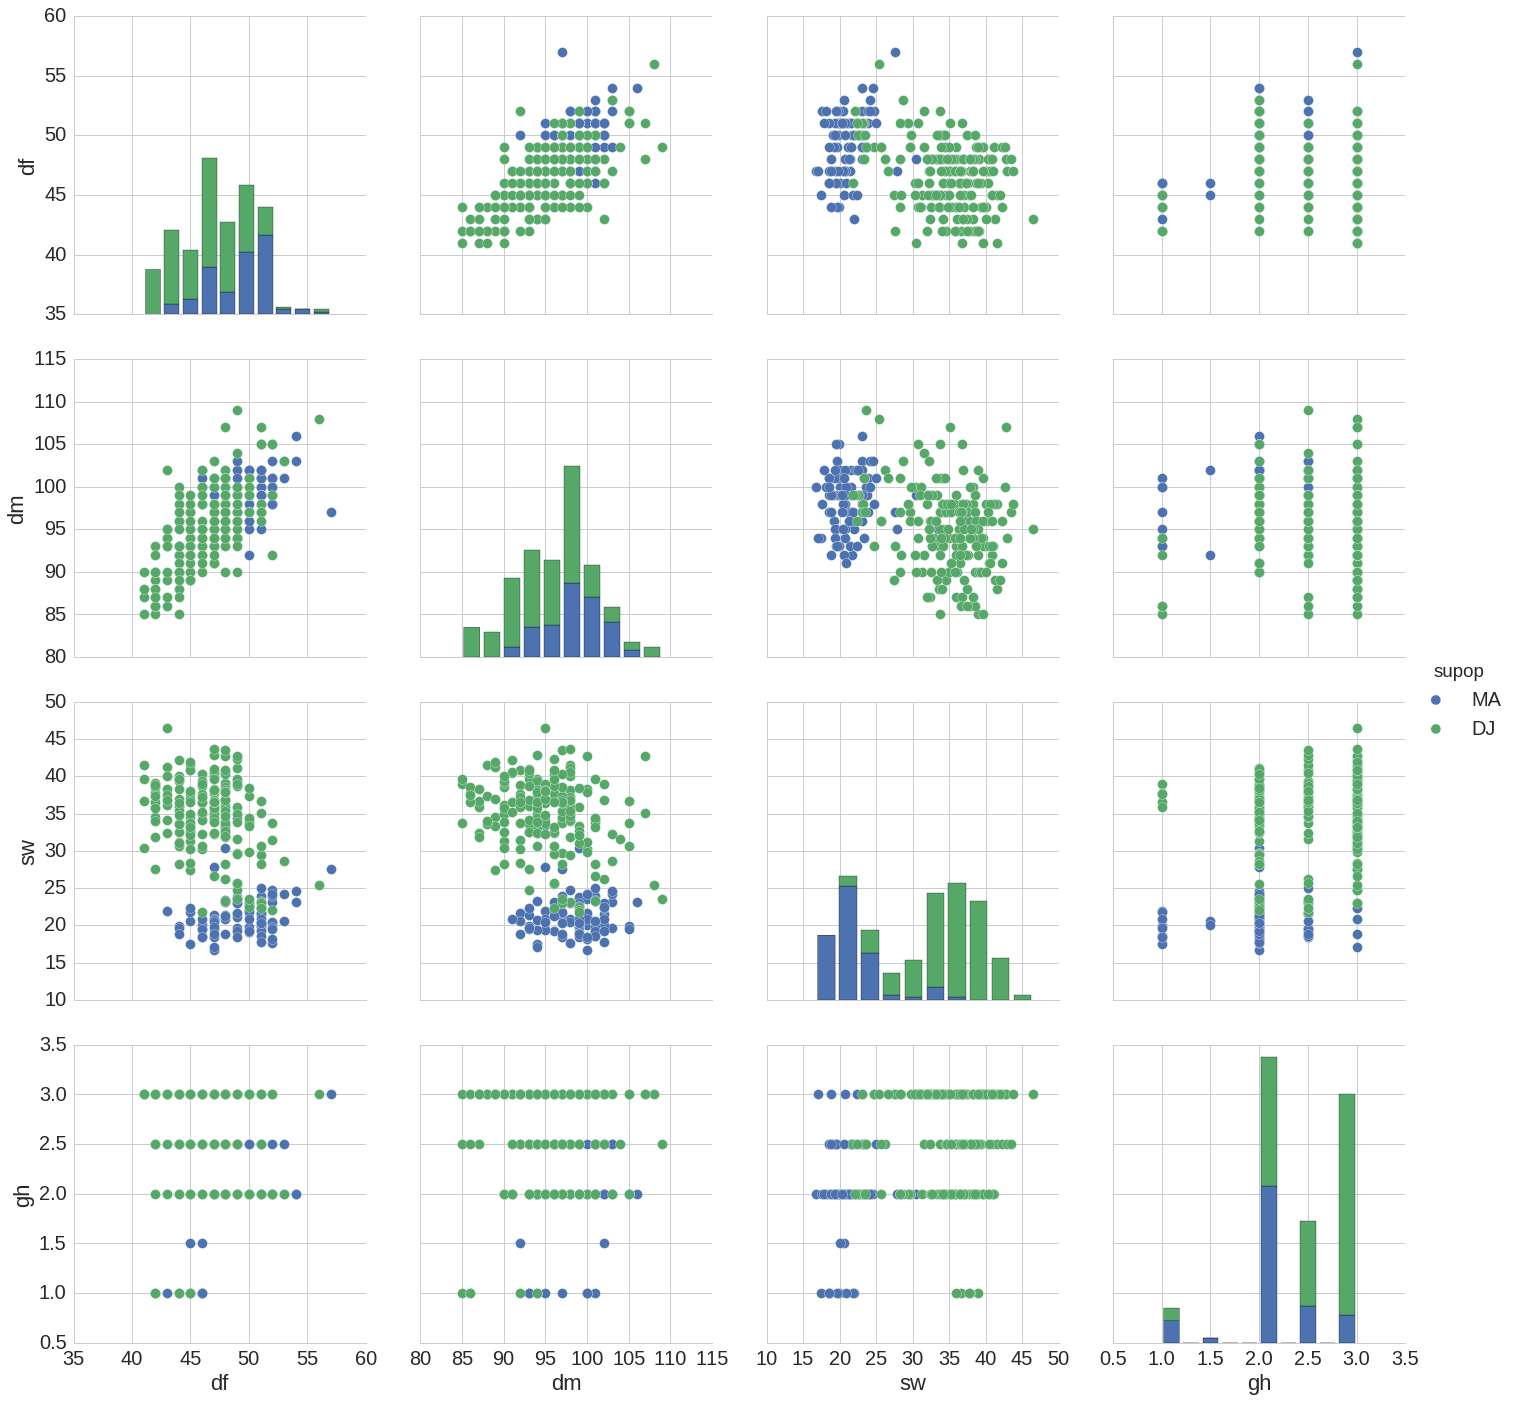

In [4]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.pairplot(pheno_all[['df', 'dm', 'sw', 'gh', 'supop']], hue='supop', size=5, 
             plot_kws={'s':100});

# All collection

Prepare phenotypes and genotypes for ML training

I will use the cross_val_score with **scorer='precision_micro'** for the classification. Then I will plot two graphs (1 DF and 1 DM) with mean +- std of the cv values (use 5 cv)

Create funcion with all the data in the model_prescreen script. N.B. for precision you should use a `make_scorer(precision_score, average=average)` like for precision_recall curve.
return a dataframe with all the prediction x classifier, so you can plot it with seaborn point_plot

I will analyze
1. Early (25 %)
2. Late (75 %)
3. 3 Classes

In [4]:
# import custom module
from model_prescreen import classification_task_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RandomizedLogisticRegression

## Feature selection approach

In [5]:
def select_features(X,y):
    selector = RandomizedLogisticRegression(n_resampling=500, 
                                            random_state=101, 
                                            selection_threshold=0.001)
    selector.fit(X,y)
    return(selector.transform(X))

## Stratify byclass

## Early 25%

In [ ]:
df = pheno_all['df']
df_classes = pd.qcut(df, q=[0,.25, 1], labels = False)

y = df_classes.values
X = final_SNPs.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   stratify = y,
                                                   random_state = 101)


X_train_s = select_features(X_train, y_train)

classification_prescreen_early = classification_task_score(X_train_s, y_train, 
                                                     strat=y_train, scorer='precision_macro',
                                                           cv = 5, jobs=7)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


## Late 25

In [8]:
df = pheno_all['df']
df_classes = pd.qcut(df, q=[0,.75, 1], labels = False)

y = df_classes.values
X = final_SNPs.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   stratify = y,
                                                   random_state = 101)

X_train_s = select_features(X_train, y_train)

classification_prescreen_late = classification_task_score(X_train_s, y_train, 
                                                     strat=y_train, scorer='precision_macro',
                                                          cv = 5, jobs=7)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Processing SGD model 1 of 9
Processing LogisticRegression model 2 of 9
Processing RandomForest model 3 of 9
Processing KNeighbors model 4 of 9
Processing GradientBoosting model 5 of 9
Processing Bagging model 6 of 9
Processing SVC model 7 of 9
Processing MLP model 8 of 9
Processing linearSVC model 9 of 9


## 3 classes

In [9]:
df = pheno_all['df']
df_classes = pd.qcut(df, q=[0,.25, .75, 1], labels = False)

y = df_classes.values
X = final_SNPs.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   stratify = y,
                                                   random_state = 101)

X_train_s = select_features(X_train, y_train)

classification_prescreen_all = classification_task_score(X_train_s, y_train, 
                                                     strat=y_train, scorer='precision_macro',
                                                         cv = 5, jobs=7)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Processing SGD model 1 of 9
Processing LogisticRegression model 2 of 9
Processing RandomForest model 3 of 9
Processing KNeighbors model 4 of 9
Processing GradientBoosting model 5 of 9
Processing Bagging model 6 of 9
Processing SVC model 7 of 9
Processing MLP model 8 of 9
Processing linearSVC model 9 of 9


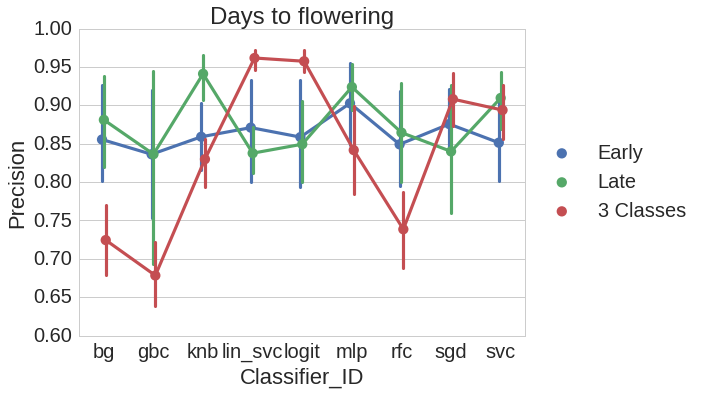

In [10]:
# plot both
classification_prescreen_early['Class']=np.repeat('Early', classification_prescreen_early.shape[0])
classification_prescreen_late['Class']=np.repeat('Late', classification_prescreen_late.shape[0])
classification_prescreen_all['Class']=np.repeat('3 Classes', classification_prescreen_all.shape[0])
classification_df = pd.concat([classification_prescreen_early, 
                       classification_prescreen_late, classification_prescreen_all])


sns.pointplot(x='Classifier_ID', y='Score', hue='Class',
                   data = classification_df, dodge=True)
plt.ylabel('Precision')
plt.title('Days to flowering')
#plt.ylim((0,1))
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5));

In [11]:
# save DF to file so you can plot again later
classification_df.to_csv('CV_DF_prediction.csv', sep=',', header=True, index=False)

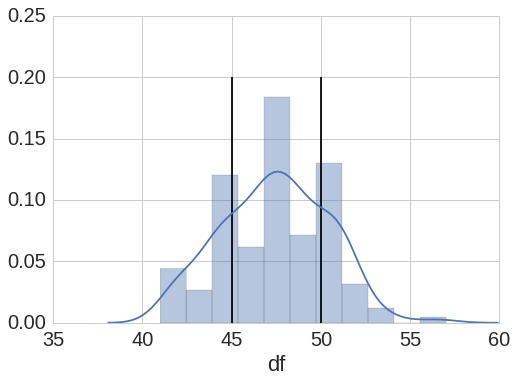

In [12]:
sns.distplot(df)
plt.vlines(np.percentile(df, 25), 0, .20)
plt.vlines(np.percentile(df, 75), 0, .20);

It seems that the best performance is achieved for 3 classes
I will start with two classes and the following algorithms using **precision_macro**:

1. linear_SVC

2. Logit

3. SGD??


# Prepare data-3 classes

Prepare data

In [13]:
from sklearn.metrics import precision_score, f1_score, classification_report, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
df = pheno_all['df']
df_classes = pd.qcut(df, q=[0,.25, .75, 1], labels = False)

y = df_classes.values
X = final_SNPs.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   stratify = y,
                                                   random_state = 101)

# create function for evaluatin shit
def report_res(estimator, X_train, y_train, average):
    y_pred = cross_val_predict(estimator, X_train,
                                 y_train, groups=y_train,
                                 cv = 5, n_jobs=6)
    print(precision_score(y_train, y_pred, average=average))
    print(classification_report(y_train, y_pred))
    return(y_pred)


def feature_selector(X,y):
    selector = RandomizedLogisticRegression(n_resampling=500, 
                                            random_state=101, 
                                            selection_threshold=0.001)
    selector.fit(X,y)
    return selector


selector = feature_selector(X_train, y_train)
X_train_s  = selector.transform(X_train)
print(X_train_s.shape)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


(224, 8343)


## Logit 

In [14]:
from sklearn.linear_model import LogisticRegression

lg_default = LogisticRegression(random_state=42)
y_pred = report_res(lg_default, X_train_s, y_train, 'macro')

0.937566137566
             precision    recall  f1-score   support

          0       0.90      0.92      0.91        62
          1       0.94      0.97      0.95       122
          2       0.97      0.85      0.91        40

avg / total       0.93      0.93      0.93       224



In [15]:
param_grid = {'penalty':['l2'],'solver':['liblinear'], 'C':np.logspace(-4,2,10),
              'class_weight': [None, 'balanced'],
              'dual':[False, True], 'tol': np.logspace(-5,-1, 5)
             }

lg = LogisticRegression(random_state=42, n_jobs=6)

lg_search_param = GridSearchCV(lg,param_grid=param_grid,
                                   scoring='precision_macro',n_jobs=6,iid=False,
                                   cv=5)
lg_search_param.fit(X_train_s, y_train)
print(lg_search_param.best_params_)
print(lg_search_param.best_estimator_)

y_pred=report_res(lg_search_param, X_train_s, y_train, 'macro')

{'solver': 'liblinear', 'penalty': 'l2', 'tol': 0.0001, 'class_weight': 'balanced', 'dual': False, 'C': 100.0}
LogisticRegression(C=100.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=6, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.928034882913
             precision    recall  f1-score   support

          0       0.88      0.92      0.90        62
          1       0.93      0.94      0.94       122
          2       0.97      0.88      0.92        40

avg / total       0.93      0.92      0.92       224



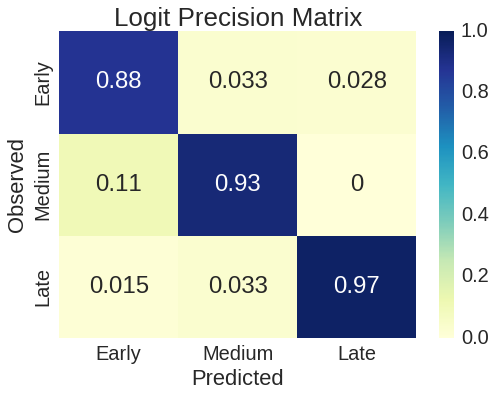

In [16]:
conf_matrix = confusion_matrix(y_train, y_pred)

# try different plots of the confusion matrix
norm_matrix = conf_matrix/conf_matrix.sum(axis=0, keepdims=True)
sns.heatmap(norm_matrix, annot=True, 
            xticklabels=['Early', 'Medium', 'Late'],
           yticklabels = ['Early', 'Medium', 'Late'], cmap="YlGnBu",
           vmin=0, vmax=1)
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.title('Logit Precision Matrix', fontsize=26)
plt.show()

## Linear_SVC

I can't improve the precision score (Always over 95%)

In [17]:
from sklearn.svm import LinearSVC

svc_default = LinearSVC(random_state=42)
y_pred = report_res(svc_default, X_train_s, y_train, 'macro')

0.959976105137
             precision    recall  f1-score   support

          0       0.94      0.94      0.94        62
          1       0.94      0.98      0.96       122
          2       1.00      0.90      0.95        40

avg / total       0.95      0.95      0.95       224



In [24]:
param_grid = {'penalty':['l2'],'loss':['hinge', 'squared_hinge'], 'C':np.logspace(-4,2,10),
              'class_weight': [None, 'balanced'],
              'dual':[True], 'tol': np.logspace(-5,-1, 5)
             }
lin_svc = LinearSVC(random_state=42)

svc_search_param = GridSearchCV(lin_svc, param_grid=param_grid,
                             scoring='precision_macro',n_jobs=6,iid=False,
                             cv = 5)

svc_search_param.fit(X_train_s, y_train)
print(svc_search_param.best_params_)
print(svc_search_param.best_estimator_)

y_pred=report_res(svc_search_param, X_train_s, y_train, 'macro')

{'penalty': 'l2', 'tol': 1.0000000000000001e-05, 'class_weight': None, 'dual': True, 'C': 0.0021544346900318821, 'loss': 'hinge'}
LinearSVC(C=0.0021544346900318821, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42,
     tol=1.0000000000000001e-05, verbose=0)
0.950614548975
             precision    recall  f1-score   support

          0       0.93      0.92      0.93        62
          1       0.94      0.98      0.96       122
          2       0.97      0.90      0.94        40

avg / total       0.95      0.95      0.95       224



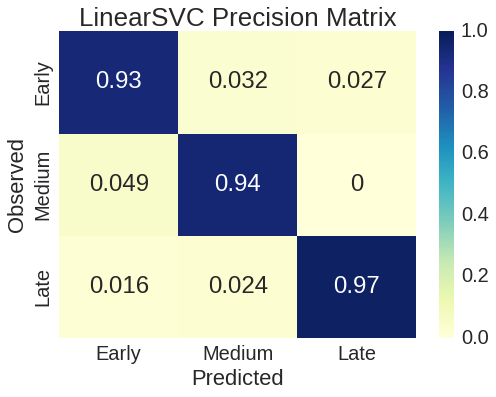

In [25]:
conf_matrix = confusion_matrix(y_train, y_pred)

# try different plots of the confusion matrix
norm_matrix = conf_matrix/conf_matrix.sum(axis=0, keepdims=True)
sns.heatmap(norm_matrix, annot=True, 
            xticklabels=['Early', 'Medium', 'Late'],
           yticklabels = ['Early', 'Medium', 'Late'], cmap="YlGnBu",
           vmin=0, vmax=1)
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.title('LinearSVC Precision Matrix', fontsize=26)
plt.show()

## Combine models

See if you improve. SVC(kernel='linear') has lowe prediction capacity

In [31]:
from sklearn.ensemble import VotingClassifier
# run again this

clf1 = LogisticRegression(C=100.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=6, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


#LogisticRegression(C=1.0, class_weight='balanced', dual=False,
#          fit_intercept=True, intercept_scaling=1, max_iter=100.0,
#          multi_class='ovr', n_jobs=6, penalty='l2', random_state=42,
#          solver='liblinear', tol=0.01, verbose=0, warm_start=False)
clf2 = LinearSVC(C=0.0021544346900318821, class_weight=None, dual=True,
                 fit_intercept=True, intercept_scaling=1, loss='hinge', max_iter=1000,
                 multi_class='ovr', penalty='l2', random_state=42,
                 tol=1.0000000000000001e-05, verbose=0)

#LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
#     intercept_scaling=1, loss='hinge', max_iter=100.0, multi_class='ovr',
#     penalty='l2', random_state=42, tol=1.0000000000000001e-05, verbose=0)

eclf = VotingClassifier(estimators=[('logit', clf1), ('linearSVC', clf2)], voting='hard')

#y_pred = report_res(eclf, X_train_s, y_train, 'macro')

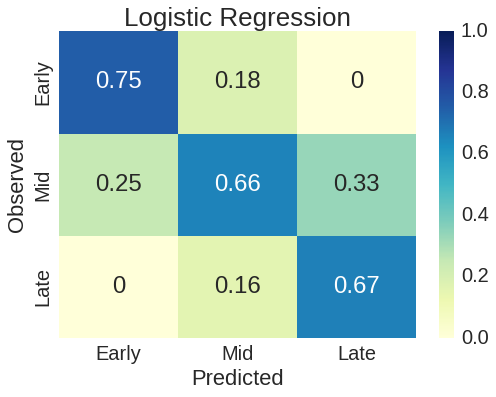

Precision Logistic Regression 0.691520467836
Precision Logistic Regression
             precision    recall  f1-score   support

          0       0.75      0.56      0.64        16
          1       0.66      0.83      0.74        30
          2       0.67      0.40      0.50        10

avg / total       0.69      0.68      0.67        56



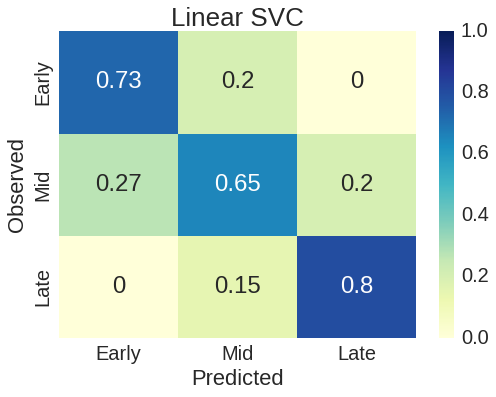

Precision Linear SVC 0.725757575758
Precision Linear SVC
             precision    recall  f1-score   support

          0       0.73      0.50      0.59        16
          1       0.65      0.87      0.74        30
          2       0.80      0.40      0.53        10

avg / total       0.70      0.68      0.66        56



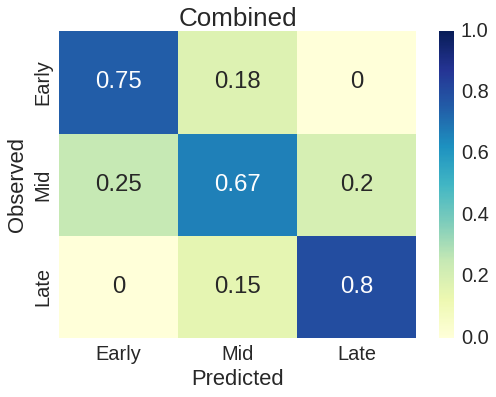

Precision Combined 0.738888888889
Precision Combined
             precision    recall  f1-score   support

          0       0.75      0.56      0.64        16
          1       0.67      0.87      0.75        30
          2       0.80      0.40      0.53        10

avg / total       0.71      0.70      0.68        56



In [38]:
# out of sample selection

# there's overfitting. I will probably need to control regularization
X_test_s = selector.transform(X_test)
for clf, label in zip([clf1, clf2, eclf], ['Logistic Regression', 
                                           'Linear SVC', 'Combined']):
    clf.fit(X_train_s, y_train)
    pred = clf.predict(X_test_s)
    conf_matrix = confusion_matrix(y_test, pred)
# try different plots of the confusion matrix
    norm_matrix = conf_matrix/conf_matrix.sum(axis=0, keepdims=True)
    sns.heatmap(norm_matrix, annot=True, 
            xticklabels=['Early', 'Mid', 'Late'],
           yticklabels = ['Early', 'Mid', 'Late'], cmap="YlGnBu",
           vmin=0, vmax=1)
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.title(label, fontsize=26)
    plt.show()
    print('Precision '+label, + precision_score(y_test, pred, average = 'macro'))
    print('Precision '+label + '\n'+ classification_report(y_test, pred))